# **TSLA Stock Exploratory Data Analysis**

In [21]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import scipy.stats as stats
from datetime import datetime
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.tools as tls

In [2]:
start_date = datetime(2017,1,1)
end_date = datetime(2023,4,28)

TSLA = yf.download('TSLA', start_date , end_date)
TSLA.reset_index(inplace = True)
TSLA['Company'] = 'TSLA'

[*********************100%%**********************]  1 of 1 completed


In [3]:
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,TSLA
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,TSLA
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,TSLA
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,TSLA
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,TSLA
...,...,...,...,...,...,...,...,...
1585,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,TSLA
1586,2023-04-24,164.649994,165.649994,158.610001,162.550003,162.550003,140006600,TSLA
1587,2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300,TSLA
1588,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100,TSLA


In [4]:
NIO = yf.download('NIO',start_date ,end_date)
NIO.reset_index(inplace=True)
NIO['Company'] = 'NIO'

LI = yf.download('LI',start_date ,end_date)
LI.reset_index(inplace=True)
LI['Company'] = 'LI'

RIVN = yf.download('RIVN',start_date ,end_date)
RIVN.reset_index(inplace=True)
RIVN['Company'] = 'RIVN'

GM = yf.download('GM',start_date ,end_date)
GM.reset_index(inplace=True)
GM['Company'] = 'GM'

TM = yf.download('TM',start_date ,end_date)
TM.reset_index(inplace=True)
TM['Company'] = 'TM'

F = yf.download('F',start_date ,end_date)
F.reset_index(inplace=True)
F['Company'] = 'F'

RACE = yf.download('RACE',start_date ,end_date)
RACE.reset_index(inplace=True)
RACE['Company'] = 'RACE'

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Concatenate all the stock dataframes into one
all_stocks = pd.concat([TSLA, NIO, LI, RIVN, GM, TM, F, RACE], axis=0)
all_stocks.reset_index(drop=True, inplace=True)

In [6]:
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,TSLA
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,TSLA
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,TSLA
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,TSLA
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,TSLA
...,...,...,...,...,...,...,...,...
10167,2023-04-21,276.809998,278.774994,274.779999,278.029999,276.040985,324300,RACE
10168,2023-04-24,278.839996,280.644012,278.839996,280.190002,280.190002,316000,RACE
10169,2023-04-25,279.959991,280.179993,277.140015,277.209991,277.209991,249800,RACE
10170,2023-04-26,278.220001,279.239990,274.630005,275.410004,275.410004,325100,RACE


In [7]:
# Calculate additional features
all_stocks['MA_10'] = all_stocks['Adj Close'].rolling(10).mean()
all_stocks['MA_20'] = all_stocks['Adj Close'].rolling(20).mean()
all_stocks['MA_60'] = all_stocks['Adj Close'].rolling(60).mean()

all_stocks['Daily Return'] = all_stocks['Adj Close'].pct_change()

In [8]:
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Company,MA_10,MA_20,MA_60,Daily Return
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,TSLA,NaN,NaN,NaN,NaN
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,TSLA,NaN,NaN,NaN,0.046085
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,TSLA,NaN,NaN,NaN,-0.001057
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,TSLA,NaN,NaN,NaN,0.009967
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,TSLA,NaN,NaN,NaN,0.009912
...,...,...,...,...,...,...,...,...,...,...,...,...
10167,2023-04-21,276.809998,278.774994,274.779999,278.029999,276.040985,324300,RACE,276.667480,271.912242,264.313659,0.007355
10168,2023-04-24,278.839996,280.644012,278.839996,280.190002,280.190002,316000,RACE,277.582776,272.748164,264.883535,0.015030
10169,2023-04-25,279.959991,280.179993,277.140015,277.209991,277.209991,249800,RACE,278.077951,273.395372,265.305286,-0.010636
10170,2023-04-26,278.220001,279.239990,274.630005,275.410004,275.410004,325100,RACE,278.153851,273.945630,265.737910,-0.006493


In [9]:
all_stocks = all_stocks[all_stocks['MA_10'].notna()]
all_stocks = all_stocks[all_stocks['MA_20'].notna()]
all_stocks = all_stocks[all_stocks['MA_60'].notna()]
all_stocks = all_stocks[all_stocks['Daily Return'].notna()]

In [10]:
stock_list = ['TSLA', 'NIO', 'LI', 'RIVN', 'GM', 'TM', 'F', 'RACE']
stock_list

['TSLA', 'NIO', 'LI', 'RIVN', 'GM', 'TM', 'F', 'RACE']

In [18]:
# Stock Prices Plot using seaborn
"""plt.figure(figsize=(25, 10))
sns.lineplot(data=all_stocks, x='Date', y='Adj Close', hue='Company')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Stock Prices')"""
import plotly.express as px
fig = px.line(all_stocks, x='Date', y='Adj Close', color='Company')
fig.show()

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA_Final = all_stocks[all_stocks['Company'] == 'TSLA']
TSLA_Final.reset_index(drop=True, inplace=True)
TSLA_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[0,0])
axes[0,0].set_title('Tesla, Inc.')

TM_Final = all_stocks[all_stocks['Company'] == 'TM']
TM_Final.reset_index(drop=True, inplace=True)
TM_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[0,1])
axes[0,1].set_title('Toyota Motor Corp.')

GM_Final = all_stocks[all_stocks['Company'] == 'GM']
GM_Final.reset_index(drop=True, inplace=True)
GM_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[1,0])
axes[1,0].set_title('General Motors Company')

RACE_Final = all_stocks[all_stocks['Company'] == 'RACE']
RACE_Final.reset_index(drop=True, inplace=True)
RACE_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[1,1])
axes[1,1].set_title('Ferrari N.V. Common Shares')

#fig.tight_layout()
fig_plotly=tls.mpl_to_plotly(fig)
fig_plotly.show()

In [31]:
# To plot the daily return percentage
'''plt.figure(figsize=(20, 20))

for i, company in enumerate(stock_list, 1):
    company_data = all_stocks[all_stocks['Company'] == company]

    plt.subplot(4, 2, i)
    sns.distplot(company_data['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(company)'''

import plotly.express as px
for i, company in enumerate(stock_list, 1):
    company_data = all_stocks[all_stocks['Company'] == company]
    fig = px.histogram(company_data, x='Daily Return', color='Company')
    fig.update_layout(title='Histogram of Daily Returns')
    fig.show()
    
    

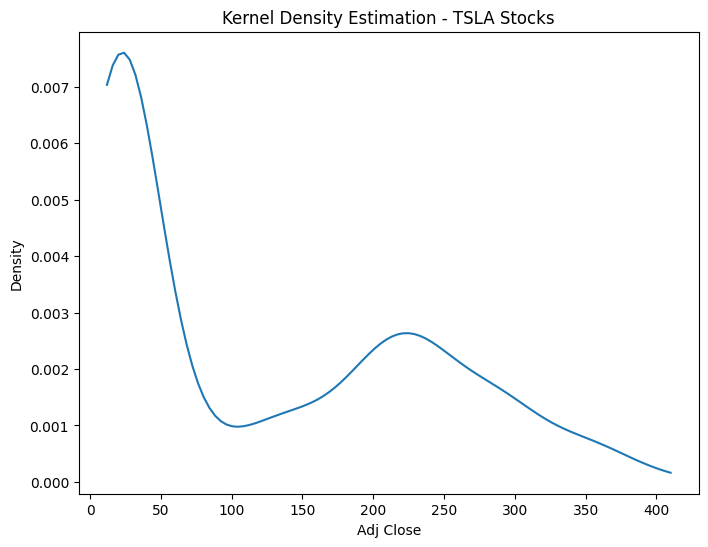

In [38]:
TSLA_Data = all_stocks[all_stocks['Company'] == 'TSLA']
TSLA_ADJ_Close = TSLA_Data['Adj Close']

# Fit the KDE to the TSLA data
kde = stats.gaussian_kde(TSLA_ADJ_Close)
x = np.linspace(TSLA_ADJ_Close.min(), TSLA_ADJ_Close.max(), 100)
y = kde(x)

# Plot the KDE
'''plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Adj Close')
plt.ylabel('Density')
plt.title('Kernel Density Estimation - TSLA Stocks')
plt.show()
'''
fig = px.line(TSLA_Data, x=x, y=y, title='Kernel Density Estimation - TSLA Stocks')
fig.show()


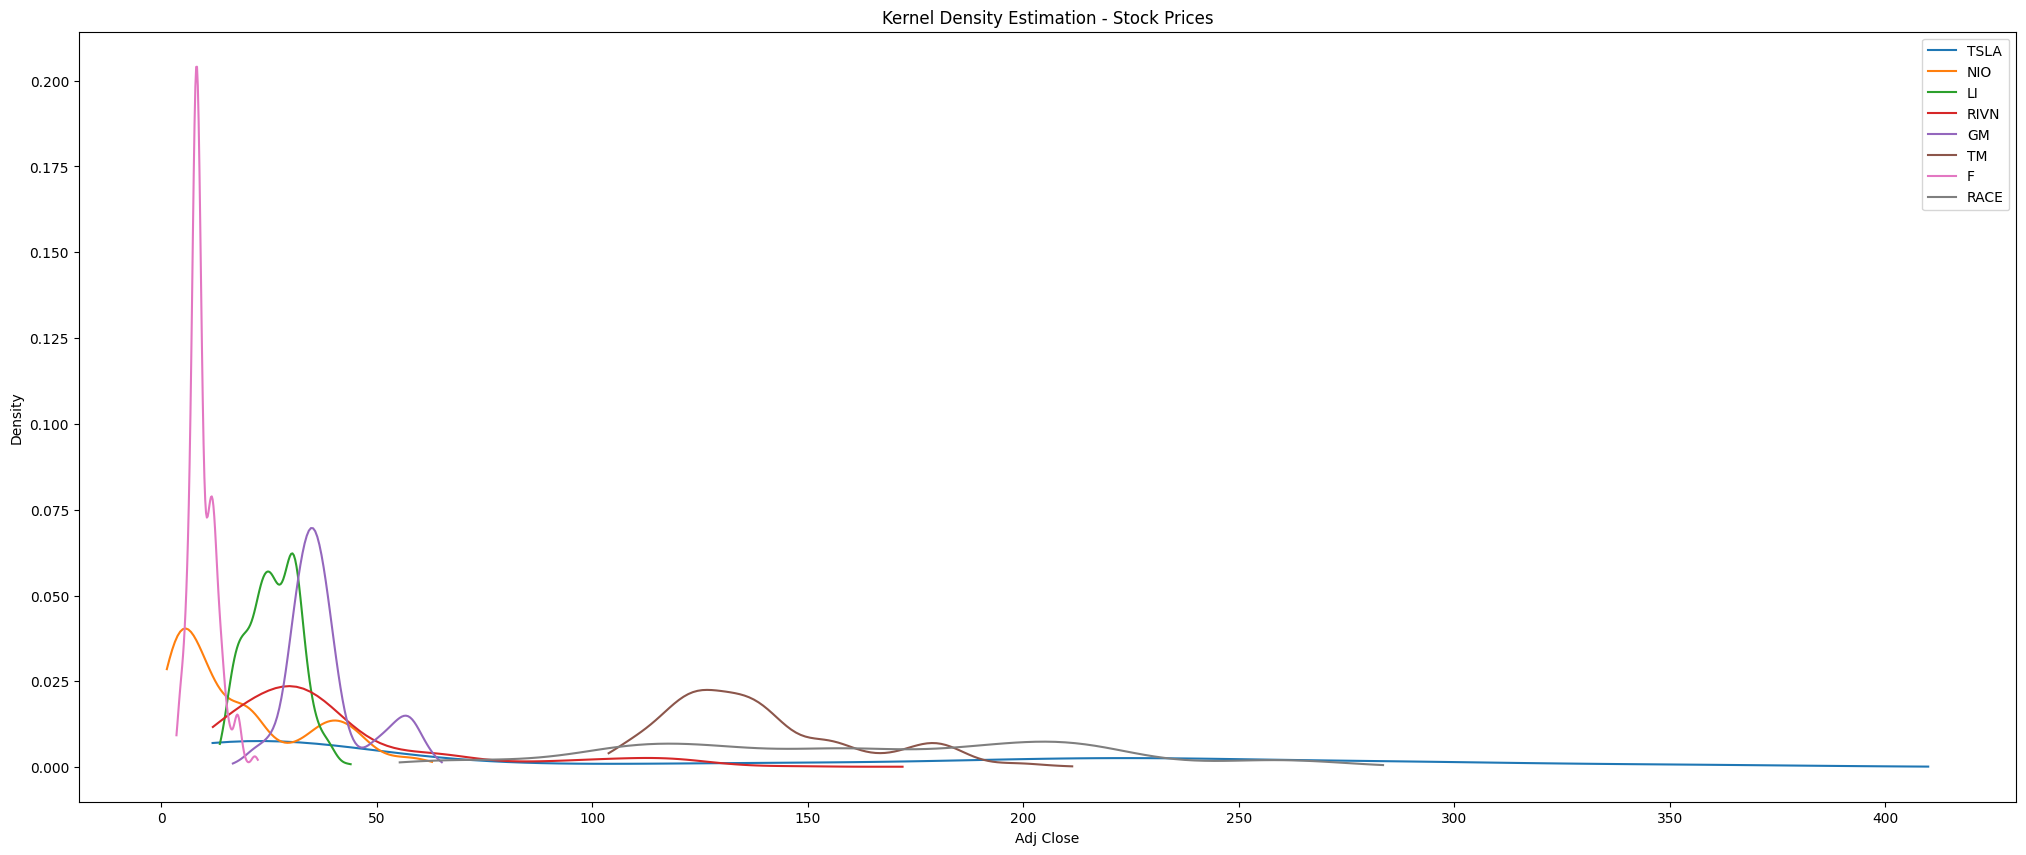

In [46]:
plt.figure(figsize=(25, 10))

for stock in stock_list:
    stock_data = all_stocks[all_stocks['Company'] == stock]
    adj_close = stock_data['Adj Close']
    kde = stats.gaussian_kde(adj_close)
    x = np.linspace(adj_close.min(), adj_close.max(), 100)
    y = kde(x)
    plt.plot(x, y, label=stock)

plt.xlabel('Adj Close')
plt.ylabel('Density')
plt.title('Kernel Density Estimation - Stock Prices')
plt.legend()
plt.show()

In [49]:
import plotly.graph_objects as go
figs=[]
for stock in stock_list:
    stock_data = all_stocks[all_stocks['Company'] == stock]
    adj_close = stock_data['Adj Close'].values
            
    kde = stats.gaussian_kde(adj_close)  
    x = np.linspace(min(adj_close), max(adj_close), 100)
    y = kde(x)
            
    fig = px.line(x=x, y=y, labels={'x':'Adj Close', 'y':'Density'}, title=stock)
    figs.append(fig)

fig = go.Figure(data=figs)
fig.update_layout(title='KDE of Stock Prices', xaxis_title='Adj Close', yaxis_title='Density')
fig.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 11.93133259,  15.9519252 ,  19.97251781,  23.99311043,  28.01370304,
                           32.03429565,  36.05488826,  40.07548088,  44.09607349,  48.1166661 ,
                           52.13725871,  56.15785133,  60.17844394,  64.19903655,  68.21962916,
                           72.24022177,  76.26081439,  80.281407  ,  84.30199961,  88.32259222,
                           92.34318484,  96.36377745, 100.38437006, 104.40496267, 108.42555529,
                          112.4461479 , 116.46674051, 120.48733312, 124.50792574, 128.52851835,
                          132.54911096, 136.56970357, 140.59029619, 144.6108888 , 148.63148141,
                          152.65207402, 156.67266664, 160.69325925, 164.71385186, 168.73444447,
                          172.75503709, 176.7756297 , 180.79622231, 184.81681492, 188.83740754,
                          192.85800015, 196.87859276, 200.89918537, 204.91977799, 208.9403706 ,
                          212.96096321, 216.98155582, 221.00214844, 225.02274105, 229.04333366,
                          233.06392627, 237.08451889, 241.1051115 , 245.12570411, 249.14629672,
                          253.16688934, 257.18748195, 261.20807456, 265.22866717, 269.24925978,
                          273.2698524 , 277.29044501, 281.31103762, 285.33163023, 289.35222285,
                          293.37281546, 297.39340807, 301.41400068, 305.4345933 , 309.45518591,
                          313.47577852, 317.49637113, 321.51696375, 325.53755636, 329.55814897,
                          333.57874158, 337.5993342 , 341.61992681, 345.64051942, 349.66111203,
                          353.68170465, 357.70229726, 361.72288987, 365.74348248, 369.7640751 ,
                          373.78466771, 377.80526032, 381.82585293, 385.84644555, 389.86703816,
                          393.88763077, 397.90822338, 401.928816  , 405.94940861, 409.97000122]),
              'xaxis': 'x',
              'y': array([0.00703661, 0.00737784, 0.00757084, 0.00760576, 0.00748318, 0.00721395,
                          0.00681782, 0.00632128, 0.00575471, 0.00514957, 0.00453567, 0.00393907,
                          0.00338067, 0.00287551, 0.00243289, 0.00205687, 0.00174722, 0.00150049,
                          0.00131106, 0.00117209, 0.00107624, 0.00101625, 0.00098529, 0.00097711,
                          0.00098621, 0.00100777, 0.00103773, 0.00107272, 0.00111007, 0.00114783,
                          0.0011848 , 0.0012205 , 0.00125519, 0.00128979, 0.00132577, 0.00136494,
                          0.00140927, 0.00146064, 0.00152056, 0.00158998, 0.00166915, 0.00175751,
                          0.0018537 , 0.00195563, 0.0020606 , 0.00216548, 0.00226692, 0.00236152,
                          0.00244602, 0.00251754, 0.00257364, 0.00261253, 0.00263318, 0.00263531,
                          0.00261952, 0.00258718, 0.00254038, 0.00248177, 0.00241432, 0.00234112,
                          0.00226507, 0.00218868, 0.00211386, 0.00204181, 0.00197297, 0.00190712,
                          0.0018435 , 0.00178102, 0.00171852, 0.00165498, 0.00158971, 0.00152247,
                          0.00145353, 0.00138361, 0.00131375, 0.00124519, 0.00117914, 0.00111664,
                          0.00105839, 0.00100465, 0.00095526, 0.00090967, 0.000867  , 0.00082619,
                          0.00078618, 0.00074598, 0.00070482, 0.00066223, 0.00061806, 0.00057244,
                          0.00052579, 0.00047871, 0.00043189, 0.00038606, 0.00034192, 0.00030004,
                          0.00026089, 0.00022478, 0.00019189, 0.00016229]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'TSLA'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1.32000005,  1.94141419,  2.56282834,  3.18424248,  3.80565662,
                           4.42707076,  5.04848491,  5.66989905,  6.29131319,  6.91272733,
                           7.53414148,  8.15555562,  8.77696976,  9.3983839 , 10.01979805,
                          10.64121219, 11.26262633, 11.88404047, 12.50545462, 13.12686876,
                          13.7482829 , 14.36969704, 14.99111119, 15.61252533, 16.23393947,
                          16.85535361, 17.47676776, 18.0981819 , 18.71959604, 19.34101018,
                          19.96242433, 20.58383847, 21.20525261, 21.82666675, 22.44808089,
                          23.06949504, 23.69090918, 24.31232332, 24.93373746, 25.55515161,
                          26.17656575, 26.79797989, 27.41939403, 28.04080818, 28.66222232,
                          29.28363646, 29.9050506 , 30.52646475, 31.14787889, 31.76929303,
                          32.39070717, 33.01212132, 33.63353546, 34.2549496 , 34.87636374,
                          35.49777789, 36.11919203, 36.74060617, 37.36202031, 37.98343446,
                          38.6048486 , 39.22626274, 39.84767688, 40.46909103, 41.09050517,
                          41.71191931, 42.33333345, 42.95474759, 43.57616174, 44.19757588,
                          44.81899002, 45.44040416, 46.06181831, 46.68323245, 47.30464659,
                          47.92606073, 48.54747488, 49.16888902, 49.79030316, 50.4117173 ,
                          51.03313145, 51.65454559, 52.27595973, 52.89737387, 53.51878802,
                          54.14020216, 54.7616163 , 55.38303044, 56.00444459, 56.62585873,
                          57.24727287, 57.86868701, 58.49010116, 59.1115153 , 59.73292944,
                          60.35434358, 60.97575773, 61.59717187, 62.21858601, 62.84000015]),
              'xaxis': 'x',
              'y': array([0.02854721, 0.0315355 , 0.03420772, 0.03646816, 0.03824552, 0.03949745,
                          0.04021168, 0.04040409, 0.04011427, 0.03939948, 0.03832817, 0.03697389,
                          0.03541046, 0.03370849, 0.0319334 , 0.03014449, 0.02839473, 0.02673056,
                          0.02519152, 0.02380936, 0.02260673, 0.02159565, 0.0207761 , 0.02013525,
                          0.01964772, 0.01927705, 0.01897857, 0.01870335, 0.01840289, 0.01803404,
                          0.01756332, 0.01697028, 0.01624921, 0.01540923, 0.01447261, 0.01347173,
                          0.01244517, 0.01143343, 0.010475  , 0.00960312, 0.0088437 , 0.00821435,
                          0.00772451, 0.00737652, 0.00716707, 0.00708893, 0.00713248, 0.00728683,
                          0.00754053, 0.0078818 , 0.00829837, 0.00877714, 0.00930387, 0.00986295,
                          0.01043751, 0.01100968, 0.01156126, 0.01207449, 0.01253281, 0.01292171,
                          0.01322919, 0.01344618, 0.01356653, 0.01358685, 0.01350625, 0.01332598,
                          0.01304912, 0.01268048, 0.01222657, 0.01169567, 0.01109802, 0.01044587,
                          0.00975336, 0.00903623, 0.00831127, 0.00759549, 0.00690524, 0.00625529,
                          0.00565798, 0.00512257, 0.00465484, 0.004257  , 0.00392781, 0.00366297,
                          0.00345558, 0.00329684, 0.00317666, 0.00308434, 0.00300923, 0.00294126,
                          0.00287145, 0.00279235, 0.00269827, 0.00258552, 0.00245244, 0.0022993 ,
                          0.00212814, 0.00194246, 0.00174683, 0.00154648]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'NIO'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([13.61999989, 13.92646452, 14.23292916, 14.5393938 , 14.84585844,
                          15.15232308, 15.45878772, 15.76525235, 16.07171699, 16.37818163,
                          16.68464627, 16.99111091, 17.29757555, 17.60404018, 17.91050482,
                          18.21696946, 18.5234341 , 18.82989874, 19.13636338, 19.44282801,
                          19.74929265, 20.05575729, 20.36222193, 20.66868657, 20.97515121,
                          21.28161584, 21.58808048, 21.89454512, 22.20100976, 22.5074744 ,
                          22.81393904, 23.12040368, 23.42686831, 23.73333295, 24.03979759,
                          24.34626223, 24.65272687, 24.95919151, 25.26565614, 25.57212078,
                          25.87858542, 26.18505006, 26.4915147 , 26.79797934, 27.10444397,
                          27.41090861, 27.71737325, 28.02383789, 28.33030253, 28.63676717,
                          28.9432318 , 29.24969644, 29.55616108, 29.86262572, 30.16909036,
                          30.475555  , 30.78201963, 31.08848427, 31.39494891, 31.70141355,
                          32.00787819, 32.31434283, 32.62080746, 32.9272721 , 33.23373674,
                          33.54020138, 33.84666602, 34.15313066, 34.45959529, 34.76605993,
                          35.07252457, 35.37898921, 35.68545385, 35.99191849, 36.29838313,
                          36.60484776, 36.9113124 , 37.21777704, 37.52424168, 37.83070632,
                          38.13717096, 38.44363559, 38.75010023, 39.05656487, 39.36302951,
                          39.66949415, 39.97595879, 40.28242342, 40.58888806, 40.8953527 ,
                          41.20181734, 41.50828198, 41.81474662, 42.12121125, 42.42767589,
                          42.73414053, 43.04060517, 43.34706981, 43.65353445, 43.95999908]),
              'xaxis': 'x',
              'y': array([0.00676099, 0.00851168, 0.01050236, 0.01270914, 0.01509342, 0.01760308,
                          0.02017532, 0.02274112, 0.02523082, 0.02758013, 0.02973569, 0.0316592 ,
                          0.03332944, 0.0347422 , 0.03590833, 0.03685086, 0.0376021 , 0.03820154,
                          0.03869472, 0.03913276, 0.03957155, 0.04006973, 0.04068456, 0.04146574,
                          0.04244815, 0.0436449 , 0.04504291, 0.04660233, 0.04826068, 0.04994094,
                          0.05156204, 0.05304916, 0.05434159, 0.05539687, 0.05619075, 0.0567145 ,
                          0.05697124, 0.05697338, 0.05674234, 0.05631054, 0.05572451, 0.05504727,
                          0.05435817, 0.05374886, 0.05331527, 0.05314636, 0.05331125, 0.05384687,
                          0.0547482 , 0.05596287, 0.05739152, 0.05889454, 0.0603047 , 0.0614446 ,
                          0.06214636, 0.06227087, 0.06172354, 0.06046401, 0.05850868, 0.0559259 ,
                          0.05282531, 0.0493433 , 0.0456273 , 0.04182104, 0.03805261, 0.03442631,
                          0.0310187 , 0.02787861, 0.02503028, 0.02247864, 0.0202154 , 0.01822454,
                          0.01648659, 0.01498088, 0.01368603, 0.01257927, 0.01163535, 0.0108258 ,
                          0.01011934, 0.00948333, 0.00888626, 0.00830064, 0.00770566, 0.00708903,
                          0.00644771, 0.00578729, 0.0051203 , 0.00446383, 0.00383672, 0.00325694,
                          0.00273936, 0.00229404, 0.00192537, 0.00163185, 0.00140658, 0.00123843,
                          0.00111365, 0.00101772, 0.00093723, 0.00086137]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'LI'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 12.        ,  13.61626257,  15.23252514,  16.84878771,  18.46505028,
                           20.08131285,  21.69757542,  23.313838  ,  24.93010057,  26.54636314,
                           28.16262571,  29.77888828,  31.39515085,  33.01141342,  34.62767599,
                           36.24393856,  37.86020113,  39.4764637 ,  41.09272627,  42.70898884,
                           44.32525142,  45.94151399,  47.55777656,  49.17403913,  50.7903017 ,
                           52.40656427,  54.02282684,  55.63908941,  57.25535198,  58.87161455,
                           60.48787712,  62.10413969,  63.72040226,  65.33666484,  66.95292741,
                           68.56918998,  70.18545255,  71.80171512,  73.41797769,  75.03424026,
                           76.65050283,  78.2667654 ,  79.88302797,  81.49929054,  83.11555311,
                           84.73181568,  86.34807826,  87.96434083,  89.5806034 ,  91.19686597,
                           92.81312854,  94.42939111,  96.04565368,  97.66191625,  99.27817882,
                          100.89444139, 102.51070396, 104.12696653, 105.74322911, 107.35949168,
                          108.97575425, 110.59201682, 112.20827939, 113.82454196, 115.44080453,
                          117.0570671 , 118.67332967, 120.28959224, 121.90585481, 123.52211738,
                          125.13837995, 126.75464253, 128.3709051 , 129.98716767, 131.60343024,
                          133.21969281, 134.83595538, 136.45221795, 138.06848052, 139.68474309,
                          141.30100566, 142.91726823, 144.5335308 , 146.14979337, 147.76605595,
                          149.38231852, 150.99858109, 152.61484366, 154.23110623, 155.8473688 ,
                          157.46363137, 159.07989394, 160.69615651, 162.31241908, 163.92868165,
                          165.54494422, 167.16120679, 168.77746937, 170.39373194, 172.00999451]),
              'xaxis': 'x',
              'y': array([0.01170474, 0.01328394, 0.01483487, 0.0163321 , 0.01775563, 0.01908791,
                          0.02030962, 0.02139551, 0.02231183, 0.02301659, 0.02346312, 0.02360644,
                          0.02341127, 0.02285981, 0.02195755, 0.02073571, 0.01924964, 0.01757357,
                          0.01579279, 0.01399456, 0.01225954, 0.0106548 , 0.00922926, 0.00801178,
                          0.00701159, 0.00622059, 0.00561691, 0.00516904, 0.00484024, 0.00459266,
                          0.00439107, 0.00420575, 0.00401465, 0.00380439, 0.00357025, 0.00331507,
                          0.00304742, 0.00277928, 0.00252355, 0.00229197, 0.00209351, 0.00193358,
                          0.00181396, 0.00173332, 0.00168807, 0.00167344, 0.00168429, 0.00171573,
                          0.00176345, 0.00182372, 0.00189334, 0.00196943, 0.00204942, 0.00213103,
                          0.00221233, 0.00229181, 0.00236832, 0.00244086, 0.00250824, 0.00256867,
                          0.00261939, 0.00265653, 0.00267529, 0.00267042, 0.00263698, 0.00257123,
                          0.00247139, 0.00233826, 0.00217533, 0.00198856, 0.00178579, 0.00157588,
                          0.00136776, 0.00116961, 0.00098815, 0.00082822, 0.00069254, 0.00058183,
                          0.00049496, 0.00042935, 0.00038136, 0.00034685, 0.0003216 , 0.00030175,
                          0.0002842 , 0.00026675, 0.00024825, 0.00022853, 0.00020817, 0.00018826,
                          0.00017005, 0.00015469, 0.00014294, 0.00013506, 0.00013076, 0.00012925,
                          0.00012939, 0.00012991, 0.00012957, 0.00012738]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'RIVN'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.639328  , 17.12894355, 17.6185591 , 18.10817464, 18.59779019,
                          19.08740573, 19.57702128, 20.06663683, 20.55625237, 21.04586792,
                          21.53548347, 22.02509901, 22.51471456, 23.00433011, 23.49394565,
                          23.9835612 , 24.47317674, 24.96279229, 25.45240784, 25.94202338,
                          26.43163893, 26.92125448, 27.41087002, 27.90048557, 28.39010111,
                          28.87971666, 29.36933221, 29.85894775, 30.3485633 , 30.83817885,
                          31.32779439, 31.81740994, 32.30702549, 32.79664103, 33.28625658,
                          33.77587212, 34.26548767, 34.75510322, 35.24471876, 35.73433431,
                          36.22394986, 36.7135654 , 37.20318095, 37.6927965 , 38.18241204,
                          38.67202759, 39.16164313, 39.65125868, 40.14087423, 40.63048977,
                          41.12010532, 41.60972087, 42.09933641, 42.58895196, 43.0785675 ,
                          43.56818305, 44.0577986 , 44.54741414, 45.03702969, 45.52664524,
                          46.01626078, 46.50587633, 46.99549188, 47.48510742, 47.97472297,
                          48.46433851, 48.95395406, 49.44356961, 49.93318515, 50.4228007 ,
                          50.91241625, 51.40203179, 51.89164734, 52.38126289, 52.87087843,
                          53.36049398, 53.85010952, 54.33972507, 54.82934062, 55.31895616,
                          55.80857171, 56.29818726, 56.7878028 , 57.27741835, 57.76703389,
                          58.25664944, 58.74626499, 59.23588053, 59.72549608, 60.21511163,
                          60.70472717, 61.19434272, 61.68395827, 62.17357381, 62.66318936,
                          63.1528049 , 63.64242045, 64.132036  , 64.62165154, 65.11126709]),
              'xaxis': 'x',
              'y': array([0.00107158, 0.00134652, 0.00166625, 0.00203497, 0.00245418, 0.00292029,
                          0.00342313, 0.00394651, 0.00447124, 0.00497993, 0.00546199, 0.005917  ,
                          0.00635527, 0.00679571, 0.0072627 , 0.00778425, 0.00839313, 0.00913113,
                          0.01005419, 0.01123506, 0.0127599 , 0.01471746, 0.01718215, 0.02019559,
                          0.02375217, 0.02779367, 0.03221489, 0.03687853, 0.04163459, 0.04633829,
                          0.0508615 , 0.05509575, 0.05894824, 0.06233456, 0.065173  , 0.06738357,
                          0.06889271, 0.06964179, 0.06959589, 0.06874966, 0.06712849, 0.06478536,
                          0.06179517, 0.05824893, 0.05424902, 0.04990602, 0.04533631, 0.04065957,
                          0.03599547, 0.03145899, 0.02715489, 0.02317174, 0.0195767 , 0.01641247,
                          0.01369711, 0.01142737, 0.00958439, 0.00814022, 0.00706314, 0.00632036,
                          0.00587798, 0.00569929, 0.00574307, 0.00596373, 0.0063138 , 0.00674847,
                          0.00723047, 0.00773374, 0.00824451, 0.00875956, 0.00928251, 0.00981938,
                          0.01037488, 0.01095018, 0.01154211, 0.01214326, 0.01274212, 0.01332271,
                          0.01386355, 0.01433689, 0.01470892, 0.014942  , 0.01499921, 0.01485064,
                          0.01447986, 0.01388864, 0.0130984 , 0.01214739, 0.01108456, 0.0099616 ,
                          0.00882552, 0.00771368, 0.00665219, 0.00565721, 0.00473807, 0.00390051,
                          0.00314892, 0.00248702, 0.00191728, 0.00143987]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'GM'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([103.81999969, 104.90636328, 105.99272688, 107.07909047, 108.16545406,
                          109.25181765, 110.33818124, 111.42454483, 112.51090842, 113.59727201,
                          114.6836356 , 115.76999919, 116.85636278, 117.94272637, 119.02908996,
                          120.11545355, 121.20181714, 122.28818073, 123.37454432, 124.46090791,
                          125.5472715 , 126.63363509, 127.71999868, 128.80636227, 129.89272586,
                          130.97908945, 132.06545304, 133.15181663, 134.23818022, 135.32454381,
                          136.4109074 , 137.49727099, 138.58363458, 139.66999817, 140.75636176,
                          141.84272535, 142.92908894, 144.01545253, 145.10181612, 146.18817971,
                          147.2745433 , 148.36090689, 149.44727048, 150.53363407, 151.61999766,
                          152.70636125, 153.79272484, 154.87908843, 155.96545202, 157.05181561,
                          158.1381792 , 159.22454279, 160.31090638, 161.39726997, 162.48363356,
                          163.56999715, 164.65636074, 165.74272433, 166.82908792, 167.91545151,
                          169.0018151 , 170.08817869, 171.17454228, 172.26090587, 173.34726946,
                          174.43363305, 175.51999664, 176.60636023, 177.69272382, 178.77908741,
                          179.865451  , 180.95181459, 182.03817818, 183.12454177, 184.21090536,
                          185.29726895, 186.38363254, 187.46999613, 188.55635972, 189.64272331,
                          190.7290869 , 191.81545049, 192.90181409, 193.98817768, 195.07454127,
                          196.16090486, 197.24726845, 198.33363204, 199.41999563, 200.50635922,
                          201.59272281, 202.6790864 , 203.76544999, 204.85181358, 205.93817717,
                          207.02454076, 208.11090435, 209.19726794, 210.28363153, 211.36999512]),
              'xaxis': 'x',
              'y': array([0.00405919, 0.00488944, 0.00575352, 0.00663695, 0.00753273, 0.00844254,
                          0.00937596, 0.01034755, 0.01137257, 0.01246196, 0.01361765, 0.0148291 ,
                          0.01607189, 0.01730897, 0.01849456, 0.0195802 , 0.0205219 , 0.02128689,
                          0.02185854, 0.02223833, 0.02244446, 0.02250746, 0.02246384, 0.02234907,
                          0.0221913 , 0.0220068 , 0.02179779, 0.02155278, 0.02124922, 0.020858  ,
                          0.0203491 , 0.01969756, 0.01888917, 0.01792488, 0.01682338, 0.01562125,
                          0.01437015, 0.01313139, 0.01196802, 0.01093595, 0.01007542, 0.00940464,
                          0.00891724, 0.00858396, 0.00835861, 0.0081868 , 0.00801572, 0.00780279,
                          0.00752152, 0.00716381, 0.00673872, 0.00626851, 0.00578329, 0.00531556,
                          0.00489559, 0.00454832, 0.00429175, 0.00413673, 0.00408757, 0.00414298,
                          0.00429697, 0.0045393 , 0.00485545, 0.00522638, 0.00562818, 0.00603232,
                          0.00640671, 0.00671776, 0.00693357, 0.0070275 , 0.00698174, 0.00678999,
                          0.00645865, 0.00600627, 0.00546134, 0.00485879, 0.00423589, 0.00362826,
                          0.00306638, 0.00257316, 0.00216253, 0.00183922, 0.00159945, 0.00143251,
                          0.00132281, 0.00125236, 0.0012032 , 0.00115965, 0.00110996, 0.00104728,
                          0.00096963, 0.00087916, 0.00078074, 0.00068034, 0.00058357, 0.00049459,
                          0.00041567, 0.0003473 , 0.00028866, 0.0002383 ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'TM'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 3.55129838,  3.74190002,  3.93250165,  4.12310329,  4.31370492,
                           4.50430656,  4.69490819,  4.88550983,  5.07611146,  5.2667131 ,
                           5.45731473,  5.64791637,  5.83851801,  6.02911964,  6.21972128,
                           6.41032291,  6.60092455,  6.79152618,  6.98212782,  7.17272945,
                           7.36333109,  7.55393272,  7.74453436,  7.935136  ,  8.12573763,
                           8.31633927,  8.5069409 ,  8.69754254,  8.88814417,  9.07874581,
                           9.26934744,  9.45994908,  9.65055071,  9.84115235, 10.03175399,
                          10.22235562, 10.41295726, 10.60355889, 10.79416053, 10.98476216,
                          11.1753638 , 11.36596543, 11.55656707, 11.7471687 , 11.93777034,
                          12.12837198, 12.31897361, 12.50957525, 12.70017688, 12.89077852,
                          13.08138015, 13.27198179, 13.46258342, 13.65318506, 13.84378669,
                          14.03438833, 14.22498997, 14.4155916 , 14.60619324, 14.79679487,
                          14.98739651, 15.17799814, 15.36859978, 15.55920141, 15.74980305,
                          15.94040468, 16.13100632, 16.32160796, 16.51220959, 16.70281123,
                          16.89341286, 17.0840145 , 17.27461613, 17.46521777, 17.6558194 ,
                          17.84642104, 18.03702267, 18.22762431, 18.41822595, 18.60882758,
                          18.79942922, 18.99003085, 19.18063249, 19.37123412, 19.56183576,
                          19.75243739, 19.94303903, 20.13364066, 20.3242423 , 20.51484394,
                          20.70544557, 20.89604721, 21.08664884, 21.27725048, 21.46785211,
                          21.65845375, 21.84905538, 22.03965702, 22.23025866, 22.42086029]),
              'xaxis': 'x',
              'y': array([0.00929174, 0.01221124, 0.01531641, 0.01842178, 0.02138418, 0.02415779,
                          0.02681999, 0.02955409, 0.03259442, 0.03615939, 0.04040632, 0.04543352,
                          0.05133131, 0.05825498, 0.06647443, 0.07635865, 0.0882783 , 0.10244631,
                          0.11874595, 0.1366067 , 0.15497817, 0.17242679, 0.18734608, 0.19823585,
                          0.20397815, 0.20403357, 0.19850791, 0.18808778, 0.17388947, 0.15728047,
                          0.13971519, 0.12259286, 0.10712773, 0.09422984, 0.08441646, 0.07778397,
                          0.07405573, 0.07269138, 0.07301968, 0.07435501, 0.07607474, 0.0776564 ,
                          0.07868837, 0.07887067, 0.07801736, 0.07606386, 0.07307361, 0.06923278,
                          0.06482189, 0.06016212, 0.05554698, 0.05118154, 0.04715144, 0.04343258,
                          0.03993475, 0.03655836, 0.03324083, 0.02997749, 0.0268155 , 0.02383023,
                          0.02109735, 0.01867139, 0.01657652, 0.01481089, 0.01336222, 0.0122277 ,
                          0.01142829, 0.01100682, 0.01100588, 0.01143189, 0.01222126, 0.01322668,
                          0.01423376, 0.01500482, 0.01533463, 0.01509846, 0.01427713, 0.0129535 ,
                          0.01128454, 0.00945998, 0.00766041, 0.00602556, 0.00463923, 0.00353123,
                          0.00269188, 0.00209141, 0.00169708, 0.00148299, 0.00143142, 0.00152741,
                          0.00175022, 0.00206588, 0.00242449, 0.0027641 , 0.00302094, 0.00314297,
                          0.00310187, 0.00289937, 0.00256519, 0.00214792]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'F'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 55.35160065,  57.65600201,  59.96040337,  62.26480472,  64.56920608,
                           66.87360744,  69.1780088 ,  71.48241016,  73.78681152,  76.09121288,
                           78.39561424,  80.7000156 ,  83.00441696,  85.30881832,  87.61321968,
                           89.91762103,  92.22202239,  94.52642375,  96.83082511,  99.13522647,
                          101.43962783, 103.74402919, 106.04843055, 108.35283191, 110.65723327,
                          112.96163463, 115.26603599, 117.57043734, 119.8748387 , 122.17924006,
                          124.48364142, 126.78804278, 129.09244414, 131.3968455 , 133.70124686,
                          136.00564822, 138.31004958, 140.61445094, 142.9188523 , 145.22325365,
                          147.52765501, 149.83205637, 152.13645773, 154.44085909, 156.74526045,
                          159.04966181, 161.35406317, 163.65846453, 165.96286589, 168.26726725,
                          170.57166861, 172.87606996, 175.18047132, 177.48487268, 179.78927404,
                          182.0936754 , 184.39807676, 186.70247812, 189.00687948, 191.31128084,
                          193.6156822 , 195.92008356, 198.22448492, 200.52888627, 202.83328763,
                          205.13768899, 207.44209035, 209.74649171, 212.05089307, 214.35529443,
                          216.65969579, 218.96409715, 221.26849851, 223.57289987, 225.87730123,
                          228.18170258, 230.48610394, 232.7905053 , 235.09490666, 237.39930802,
                          239.70370938, 242.00811074, 244.3125121 , 246.61691346, 248.92131482,
                          251.22571618, 253.53011754, 255.8345189 , 258.13892025, 260.44332161,
                          262.74772297, 265.05212433, 267.35652569, 269.66092705, 271.96532841,
                          274.26972977, 276.57413113, 278.87853249, 281.18293385, 283.48733521]),
              'xaxis': 'x',
              'y': array([0.00139312, 0.00156682, 0.00172056, 0.00184896, 0.00194975, 0.00202417,
                          0.00207681, 0.00211502, 0.00214818, 0.00218681, 0.00224191, 0.00232428,
                          0.00244397, 0.00260959, 0.00282756, 0.00310108, 0.00342919, 0.003806  ,
                          0.00422047, 0.00465693, 0.00509637, 0.00551833, 0.00590315, 0.00623404,
                          0.0064986 , 0.00668964, 0.00680518, 0.00684771, 0.00682331, 0.00674058,
                          0.00660993, 0.00644313, 0.00625305, 0.00605348, 0.00585859, 0.0056821 ,
                          0.00553591, 0.00542869, 0.0053645 , 0.00534196, 0.00535425, 0.00539002,
                          0.00543522, 0.00547545, 0.0054985 , 0.00549647, 0.00546723, 0.00541484,
                          0.00534884, 0.00528266, 0.00523136, 0.00520923, 0.00522757, 0.0052932 ,
                          0.00540778, 0.00556802, 0.00576666, 0.00599374, 0.00623796, 0.00648763,
                          0.0067311 , 0.00695672, 0.00715242, 0.00730541, 0.0074022 , 0.00742923,
                          0.00737422, 0.00722795, 0.00698603, 0.00665051, 0.00623052, 0.00574207,
                          0.00520677, 0.00464978, 0.00409733, 0.00357426, 0.00310183, 0.00269624,
                          0.00236771, 0.00212033, 0.00195234, 0.00185682, 0.00182268, 0.00183571,
                          0.00187984, 0.00193839, 0.00199542, 0.00203689, 0.00205179, 0.00203277,
                          0.00197658, 0.00188388, 0.00175878, 0.00160789, 0.00143938, 0.00126189,
                          0.0010836 , 0.00091158, 0.00075132, 0.00060668]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'RACE'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])